In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

In [3]:
x, y = make_blobs(n_samples=800, centers=5, cluster_std=0.75)

In [4]:
def find_clusters(x, n_clusters, seed=400):
    rng = np.random.RandomState(seed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    while True:
        labels = pairwise_distances_argmin(x, centers)
        new_centers = np.array([x[labels == i].mean(0)
                                for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

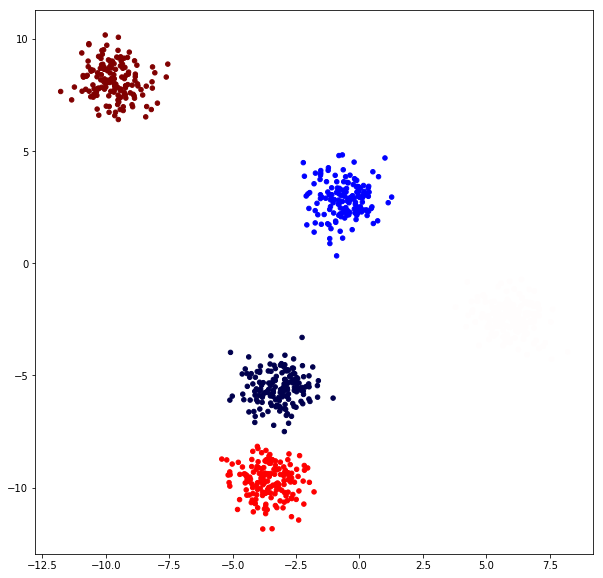

In [5]:
centers, labels = find_clusters(x, 5)
fig = plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:, 1], c=labels, s=20, cmap='seismic');